# Average House Sale Prices forecast in Windham

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('Windham.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,154869.17,176613.38,Windham
1,2001-02-01,173766.78,173352.23,Windham
2,2001-03-01,158025.11,167094.61,Windham
3,2001-04-01,157416.73,157114.10,Windham
4,2001-05-01,177949.35,185867.17,Windham


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,154869.17,176613.38
1,2001-02-01,173766.78,173352.23
2,2001-03-01,158025.11,167094.61
3,2001-04-01,157416.73,157114.10
4,2001-05-01,177949.35,185867.17


Extracting only Median Sale Price as a dataframe by removing Median Sale Price feature

In [34]:
average_data=data_frame.drop(['Median Sale Price'],axis=1)

## Forecasting average_data

In [35]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,176613.38
1,2001-02-01,173352.23
2,2001-03-01,167094.61
3,2001-04-01,157114.10
4,2001-05-01,185867.17


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
average_data.columns=['ds','y']

In [37]:
average_data

,ds,y
0,2001-01-01,176613.38
1,2001-02-01,173352.23
2,2001-03-01,167094.61
3,2001-04-01,157114.10
4,2001-05-01,185867.17
...,...,...
245,2021-06-01,255984.24
246,2021-07-01,273981.86
247,2021-08-01,263424.27
248,2021-09-01,272642.60


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(average_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,274830.752864,257992.511690,293478.870605
270,2023-06-30,254393.921041,237398.090233,272352.485794
271,2023-07-31,274089.102599,257306.417780,291430.916945
272,2023-08-31,280805.894259,262900.296264,298354.354922
273,2023-09-30,276011.759434,256765.855398,295676.640609


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,166175.486465,145184.590386,176497.473839,166175.486465,166175.486465,-5177.265939,-5177.265939,-5177.265939,-5177.265939,-5177.265939,-5177.265939,0.0,0.0,0.0,160998.220526
1,2001-02-01,168324.403032,147406.149247,179850.263038,168324.403032,168324.403032,-4512.536348,-4512.536348,-4512.536348,-4512.536348,-4512.536348,-4512.536348,0.0,0.0,0.0,163811.866684
2,2001-03-01,170265.359931,144018.571307,177406.027623,170265.359931,170265.359931,-9382.138939,-9382.138939,-9382.138939,-9382.138939,-9382.138939,-9382.138939,0.0,0.0,0.0,160883.220992
3,2001-04-01,172414.276498,148172.513317,180058.816787,172414.276498,172414.276498,-7811.405940,-7811.405940,-7811.405940,-7811.405940,-7811.405940,-7811.405940,0.0,0.0,0.0,164602.870558
4,2001-05-01,174493.873176,160076.352940,191812.518161,174493.873176,174493.873176,2031.735088,2031.735088,2031.735088,2031.735088,2031.735088,2031.735088,0.0,0.0,0.0,176525.608265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,262796.978035,257992.511690,293478.870605,256611.476577,269610.381401,12033.774830,12033.774830,12033.774830,12033.774830,12033.774830,12033.774830,0.0,0.0,0.0,274830.752864
270,2023-06-30,263849.754172,237398.090233,272352.485794,257180.441450,271122.292535,-9455.833130,-9455.833130,-9455.833130,-9455.833130,-9455.833130,-9455.833130,0.0,0.0,0.0,254393.921041
271,2023-07-31,264937.622847,257306.417780,291430.916945,257607.320431,272849.561339,9151.479752,9151.479752,9151.479752,9151.479752,9151.479752,9151.479752,0.0,0.0,0.0,274089.102599
272,2023-08-31,266025.491522,262900.296264,298354.354922,258175.002234,274740.221139,14780.402737,14780.402737,14780.402737,14780.402737,14780.402737,14780.402737,0.0,0.0,0.0,280805.894259


## Plotting the forecast data

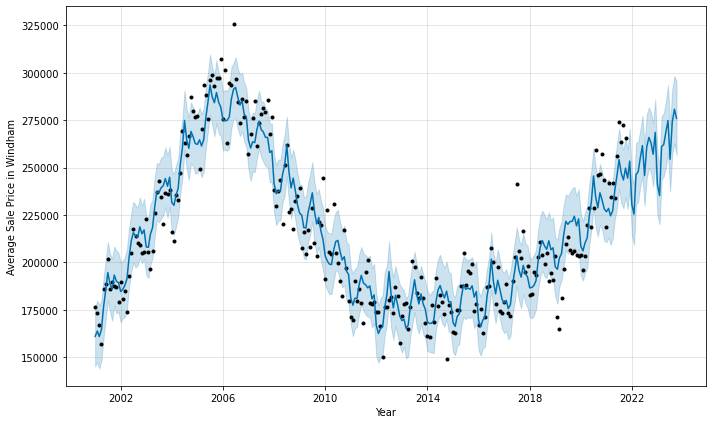

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

## Plotting components of forecast data

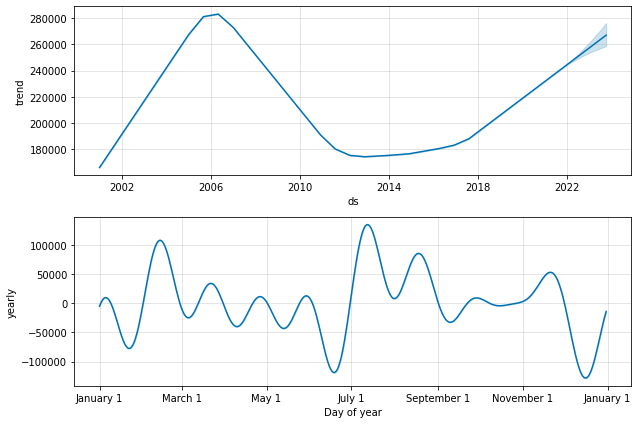

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics(module used to supervise the model)

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,2.706281e+08,16450.778173,11732.400401,0.051886,0.030840,0.052351,0.659091
1,40 days,2.399799e+08,15491.284691,11067.289894,0.049761,0.030840,0.049849,0.681818
2,42 days,2.427160e+08,15579.344317,11244.233113,0.050639,0.031228,0.050769,0.681818
3,44 days,2.507630e+08,15835.498562,11472.655745,0.051780,0.031228,0.052191,0.670455
4,45 days,2.777133e+08,16664.732158,11985.825722,0.053430,0.031228,0.053750,0.681818


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.9481139778472%
Horizon: 40 days 00:00:00, Accuracy: 99.95023877845321%
Horizon: 42 days 00:00:00, Accuracy: 99.94936115055785%
Horizon: 44 days 00:00:00, Accuracy: 99.94822040063625%
Horizon: 45 days 00:00:00, Accuracy: 99.9465704818071%
Horizon: 46 days 00:00:00, Accuracy: 99.94743146478781%
Horizon: 47 days 00:00:00, Accuracy: 99.94749087295173%
Horizon: 49 days 00:00:00, Accuracy: 99.94719073337268%
Horizon: 50 days 00:00:00, Accuracy: 99.94922840035395%
Horizon: 51 days 00:00:00, Accuracy: 99.94677107648745%
Horizon: 52 days 00:00:00, Accuracy: 99.94684832225992%
Horizon: 54 days 00:00:00, Accuracy: 99.94485088798251%
Horizon: 55 days 00:00:00, Accuracy: 99.94777067110346%
Horizon: 56 days 00:00:00, Accuracy: 99.94515661426843%
Horizon: 58 days 00:00:00, Accuracy: 99.94662262788042%
Horizon: 60 days 00:00:00, Accuracy: 99.94565616545275%
Horizon: 61 days 00:00:00, Accuracy: 99.94341165423799%
Horizon: 62 days 00:00:00, Accuracy: 99.9431803284

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

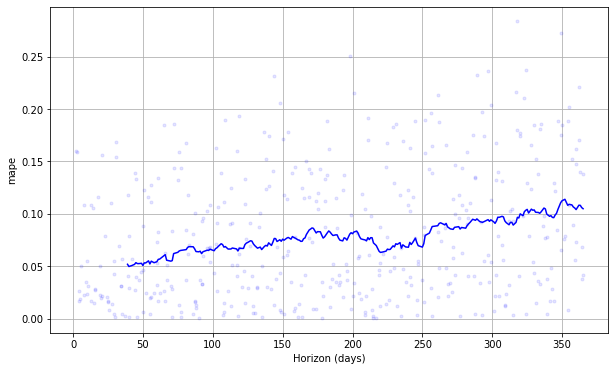

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 80-90.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_average_sale_price.pkl','wb') as file:
    pickle.dump(m,file)